In [474]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

PHẦN 1 : DATA CLEANSING & FEATURE ENGINEERING

Câu 01 :

In [475]:
column_names = ["PassengerId", "Survived", "Pclass", "Name", 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [476]:
df = pd.read_csv("titanic_disaster.csv", names = column_names)

In [477]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,NaN,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C


In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  892 non-null    object
 1   Survived     892 non-null    object
 2   Pclass       892 non-null    object
 3   Name         892 non-null    object
 4   Sex          892 non-null    object
 5   Age          715 non-null    object
 6   SibSp        892 non-null    object
 7   Parch        892 non-null    object
 8   Ticket       892 non-null    object
 9   Fare         892 non-null    object
 10  Cabin        205 non-null    object
 11  Embarked     890 non-null    object
dtypes: object(12)
memory usage: 83.8+ KB


In [479]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S
6,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,NaN,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S


Câu 02 :

In [480]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

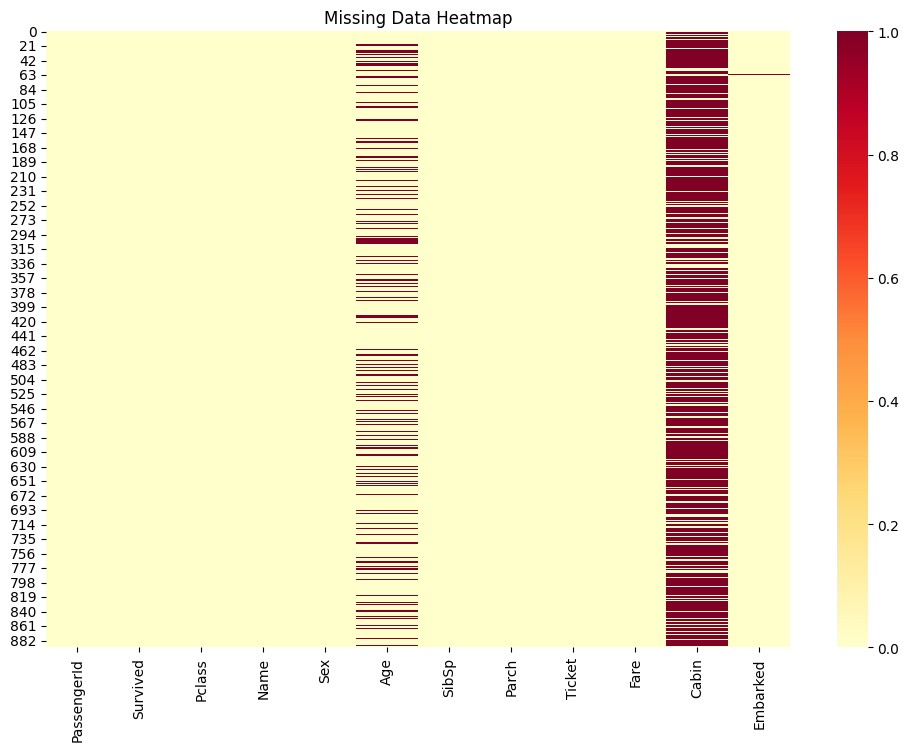

In [481]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='YlOrRd')
plt.title('Missing Data Heatmap')
plt.show()

In [482]:
print(f"Tỷ lệ thiệu dữ liệu Age: {df['Age'].isnull().mean():.2%}")
print(f"Tỷ lệ thiệu dữ liệu Cabin: {df['Cabin'].isnull().mean():.2%}")
print(f"Tỷ lệ thiệu dữ liệu Embarked: {df['Embarked'].isnull().mean():.2%}")

Tỷ lệ thiệu dữ liệu Age: 19.84%
Tỷ lệ thiệu dữ liệu Cabin: 77.02%
Tỷ lệ thiệu dữ liệu Embarked: 0.22%


Câu 03 :

In [483]:
df[['firstName', 'secondName']] = df['Name'].str.split(', ', expand=True)

In [484]:
df = df.drop('Name', axis=1)

In [485]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name,None
1,1,0,3,male,22,1,0,A/5 21171,7.25,NaN,S,Braund,Mr. Owen Harris
2,2,1,1,female,38,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
3,3,1,3,female,26,0,0,STON/O2. 3101282,7.925,NaN,S,Heikkinen,Miss. Laina
4,4,1,1,female,35,1,0,113803,53.1,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,0,2,male,27,0,0,211536,13,NaN,S,Montvila,Rev. Juozas
888,888,1,1,female,19,0,0,112053,30,B42,S,Graham,Miss. Margaret Edith
889,889,0,3,female,NaN,1,2,W./C. 6607,23.45,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie"""
890,890,1,1,male,26,0,0,111369,30,C148,C,Behr,Mr. Karl Howell


Câu 04 :

In [486]:
df['Sex'] = df['Sex'].replace(['male', 'female'], ['M', 'F'])

In [487]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name,None
1,1,0,3,M,22,1,0,A/5 21171,7.25,NaN,S,Braund,Mr. Owen Harris
2,2,1,1,F,38,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
3,3,1,3,F,26,0,0,STON/O2. 3101282,7.925,NaN,S,Heikkinen,Miss. Laina
4,4,1,1,F,35,1,0,113803,53.1,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,0,2,M,27,0,0,211536,13,NaN,S,Montvila,Rev. Juozas
888,888,1,1,F,19,0,0,112053,30,B42,S,Graham,Miss. Margaret Edith
889,889,0,3,F,NaN,1,2,W./C. 6607,23.45,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie"""
890,890,1,1,M,26,0,0,111369,30,C148,C,Behr,Mr. Karl Howell


Câu 05 :

A :

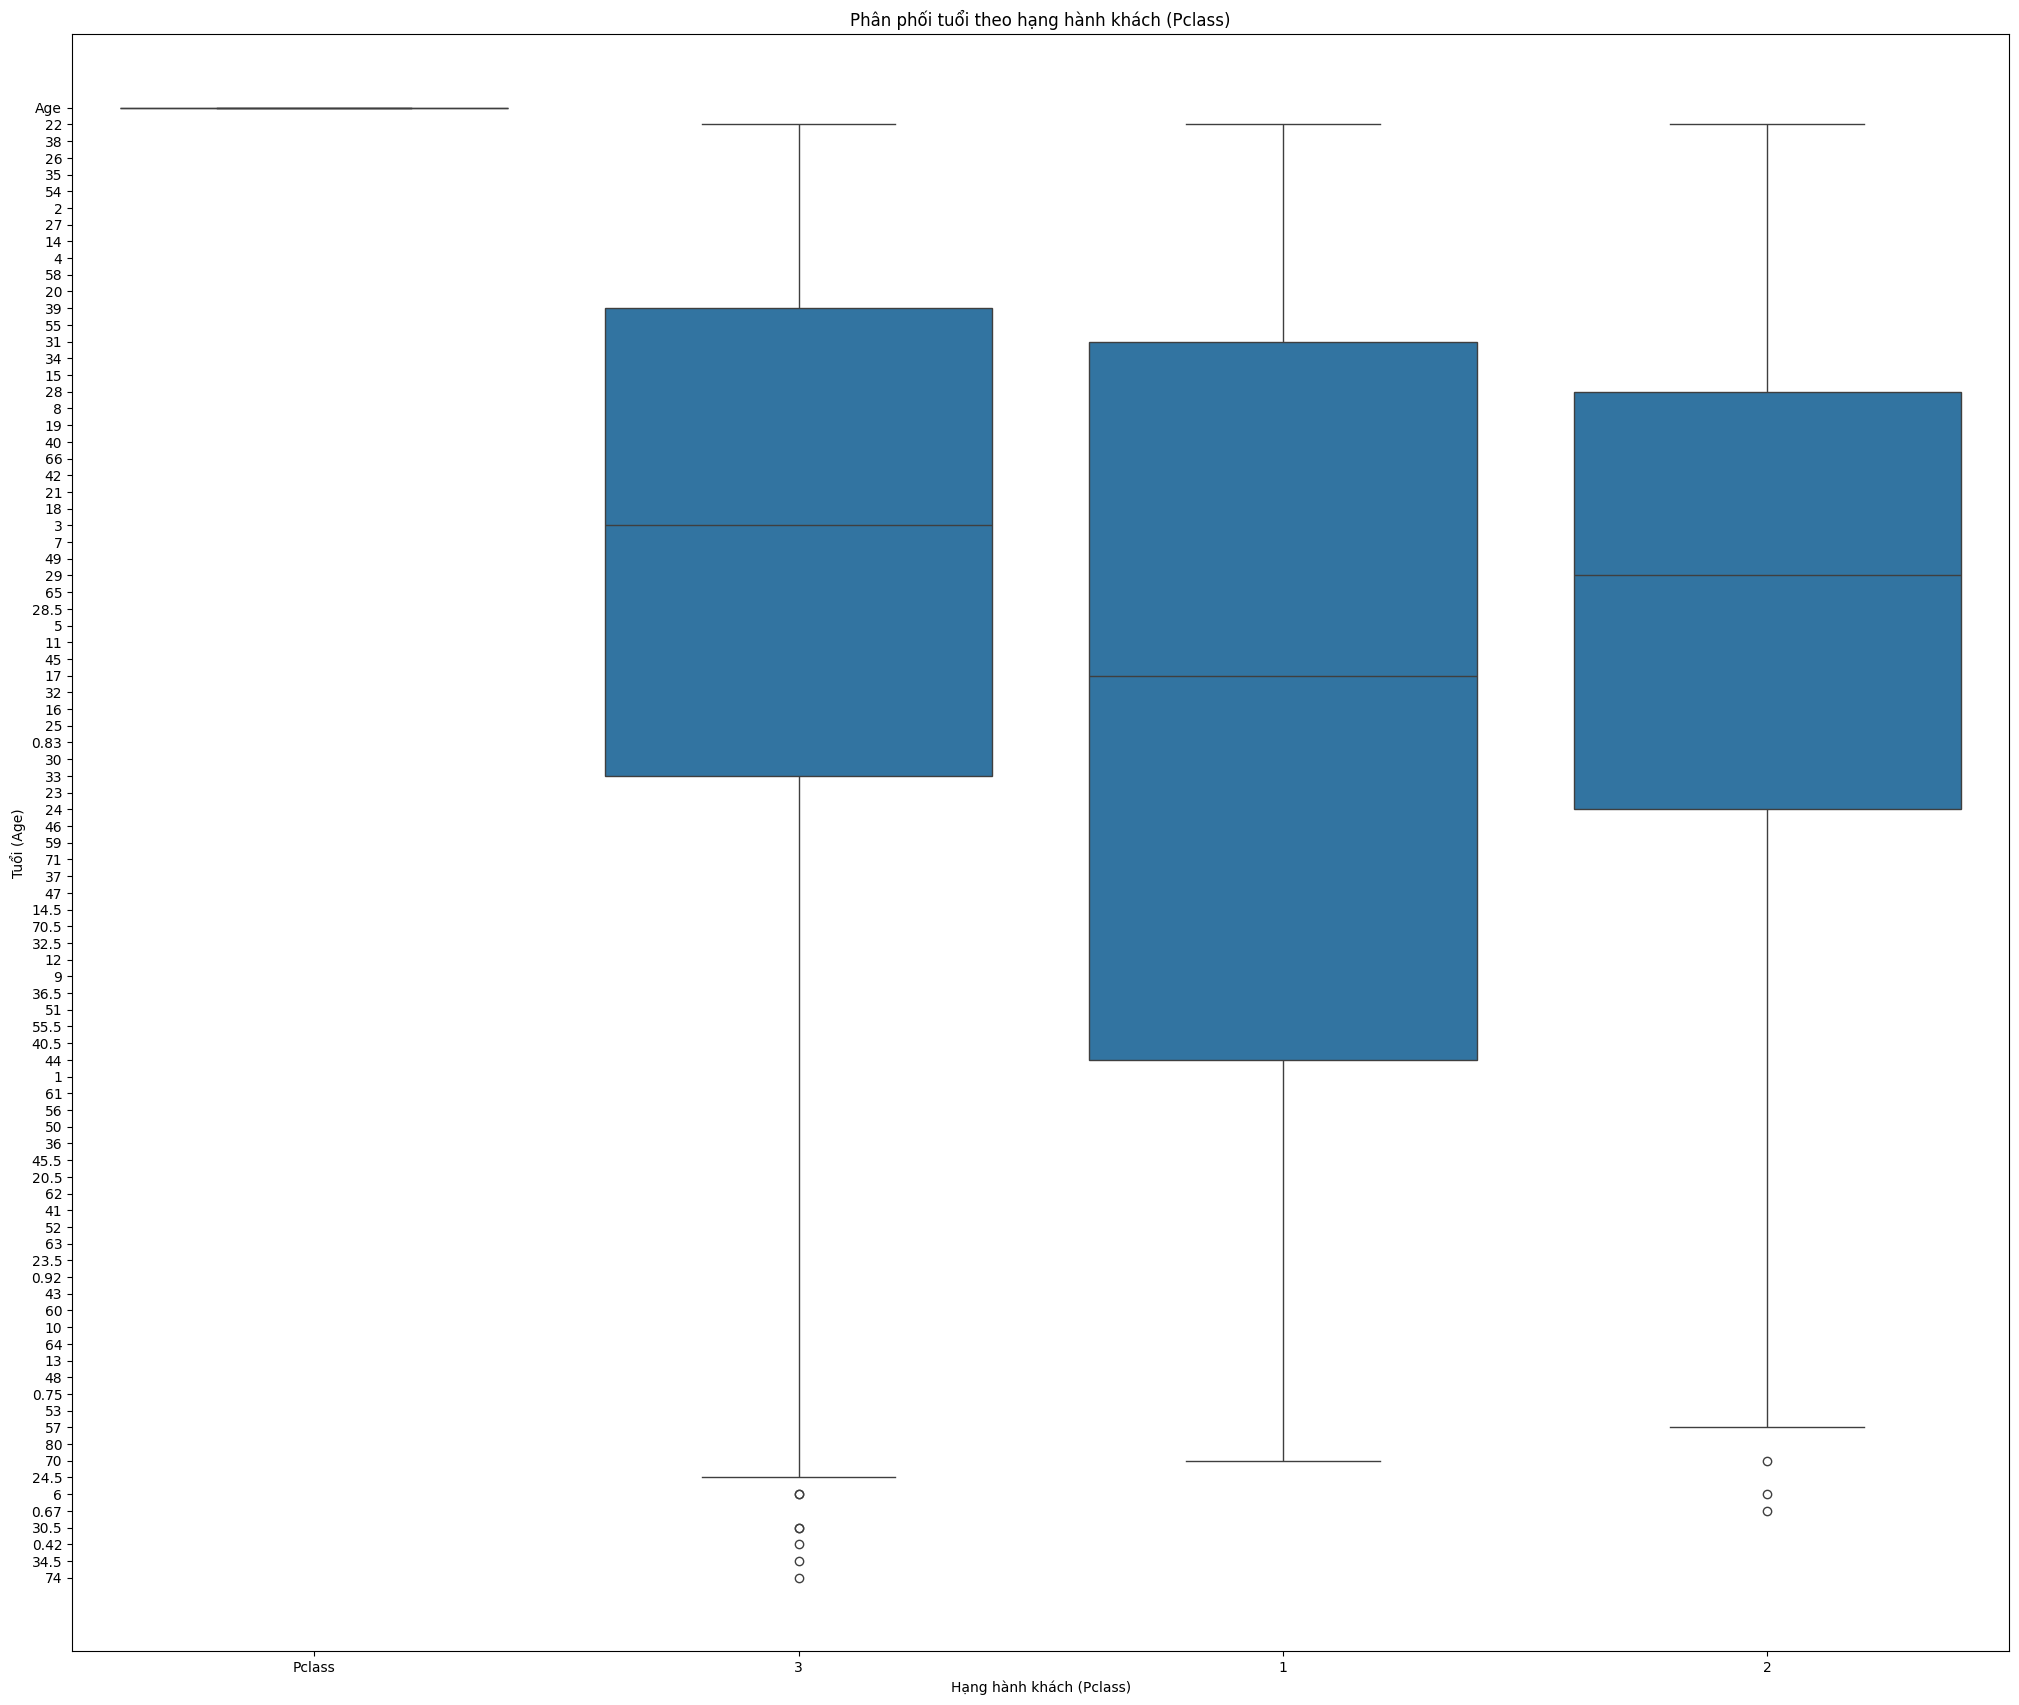

In [488]:
plt.figure(figsize=(25, 21))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Phân phối tuổi theo hạng hành khách (Pclass)')
plt.xlabel('Hạng hành khách (Pclass)')
plt.ylabel('Tuổi (Age)')
plt.show()

In [489]:
df['Pclass'].isnull().sum()

0

In [490]:
df['Age'].isnull().sum()

177

In [491]:
non_numeric_ages = df['Age'].apply(lambda x: not pd.api.types.is_numeric_dtype(type(x)))
print(f"Các giá trị không phải số trong cột 'age':\n{df[non_numeric_ages]}")

Các giá trị không phải số trong cột 'age':
     PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0    PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket   
1              1         0       3    M   22      1      0         A/5 21171   
2              2         1       1    F   38      1      0          PC 17599   
3              3         1       3    F   26      0      0  STON/O2. 3101282   
4              4         1       1    F   35      1      0            113803   
..           ...       ...     ...  ...  ...    ...    ...               ...   
886          886         0       3    F   39      0      5            382652   
887          887         0       2    M   27      0      0            211536   
888          888         1       1    F   19      0      0            112053   
890          890         1       1    M   26      0      0            111369   
891          891         0       3    M   32      0      0            370376 

In [492]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [493]:
mean_age_by_pclass = df.groupby('Pclass')['Age'].mean()
print(mean_age_by_pclass)

Pclass
1         38.233441
2         29.877630
3         25.140620
Pclass          NaN
Name: Age, dtype: float64


In [494]:
for pclass, mean_age in mean_age_by_pclass.items():
    print(f"Hạng {pclass}: Tuổi trung bình là {mean_age:.2f} tuổi")

Hạng 1: Tuổi trung bình là 38.23 tuổi
Hạng 2: Tuổi trung bình là 29.88 tuổi
Hạng 3: Tuổi trung bình là 25.14 tuổi
Hạng Pclass: Tuổi trung bình là nan tuổi


B :

In [495]:
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))

In [496]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,PassengerId,Survived,Pclass,Sex,NaN,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name,None
1,1,0,3,M,22.0,1,0,A/5 21171,7.25,NaN,S,Braund,Mr. Owen Harris
2,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
3,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,Heikkinen,Miss. Laina
4,4,1,1,F,35.0,1,0,113803,53.1,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)


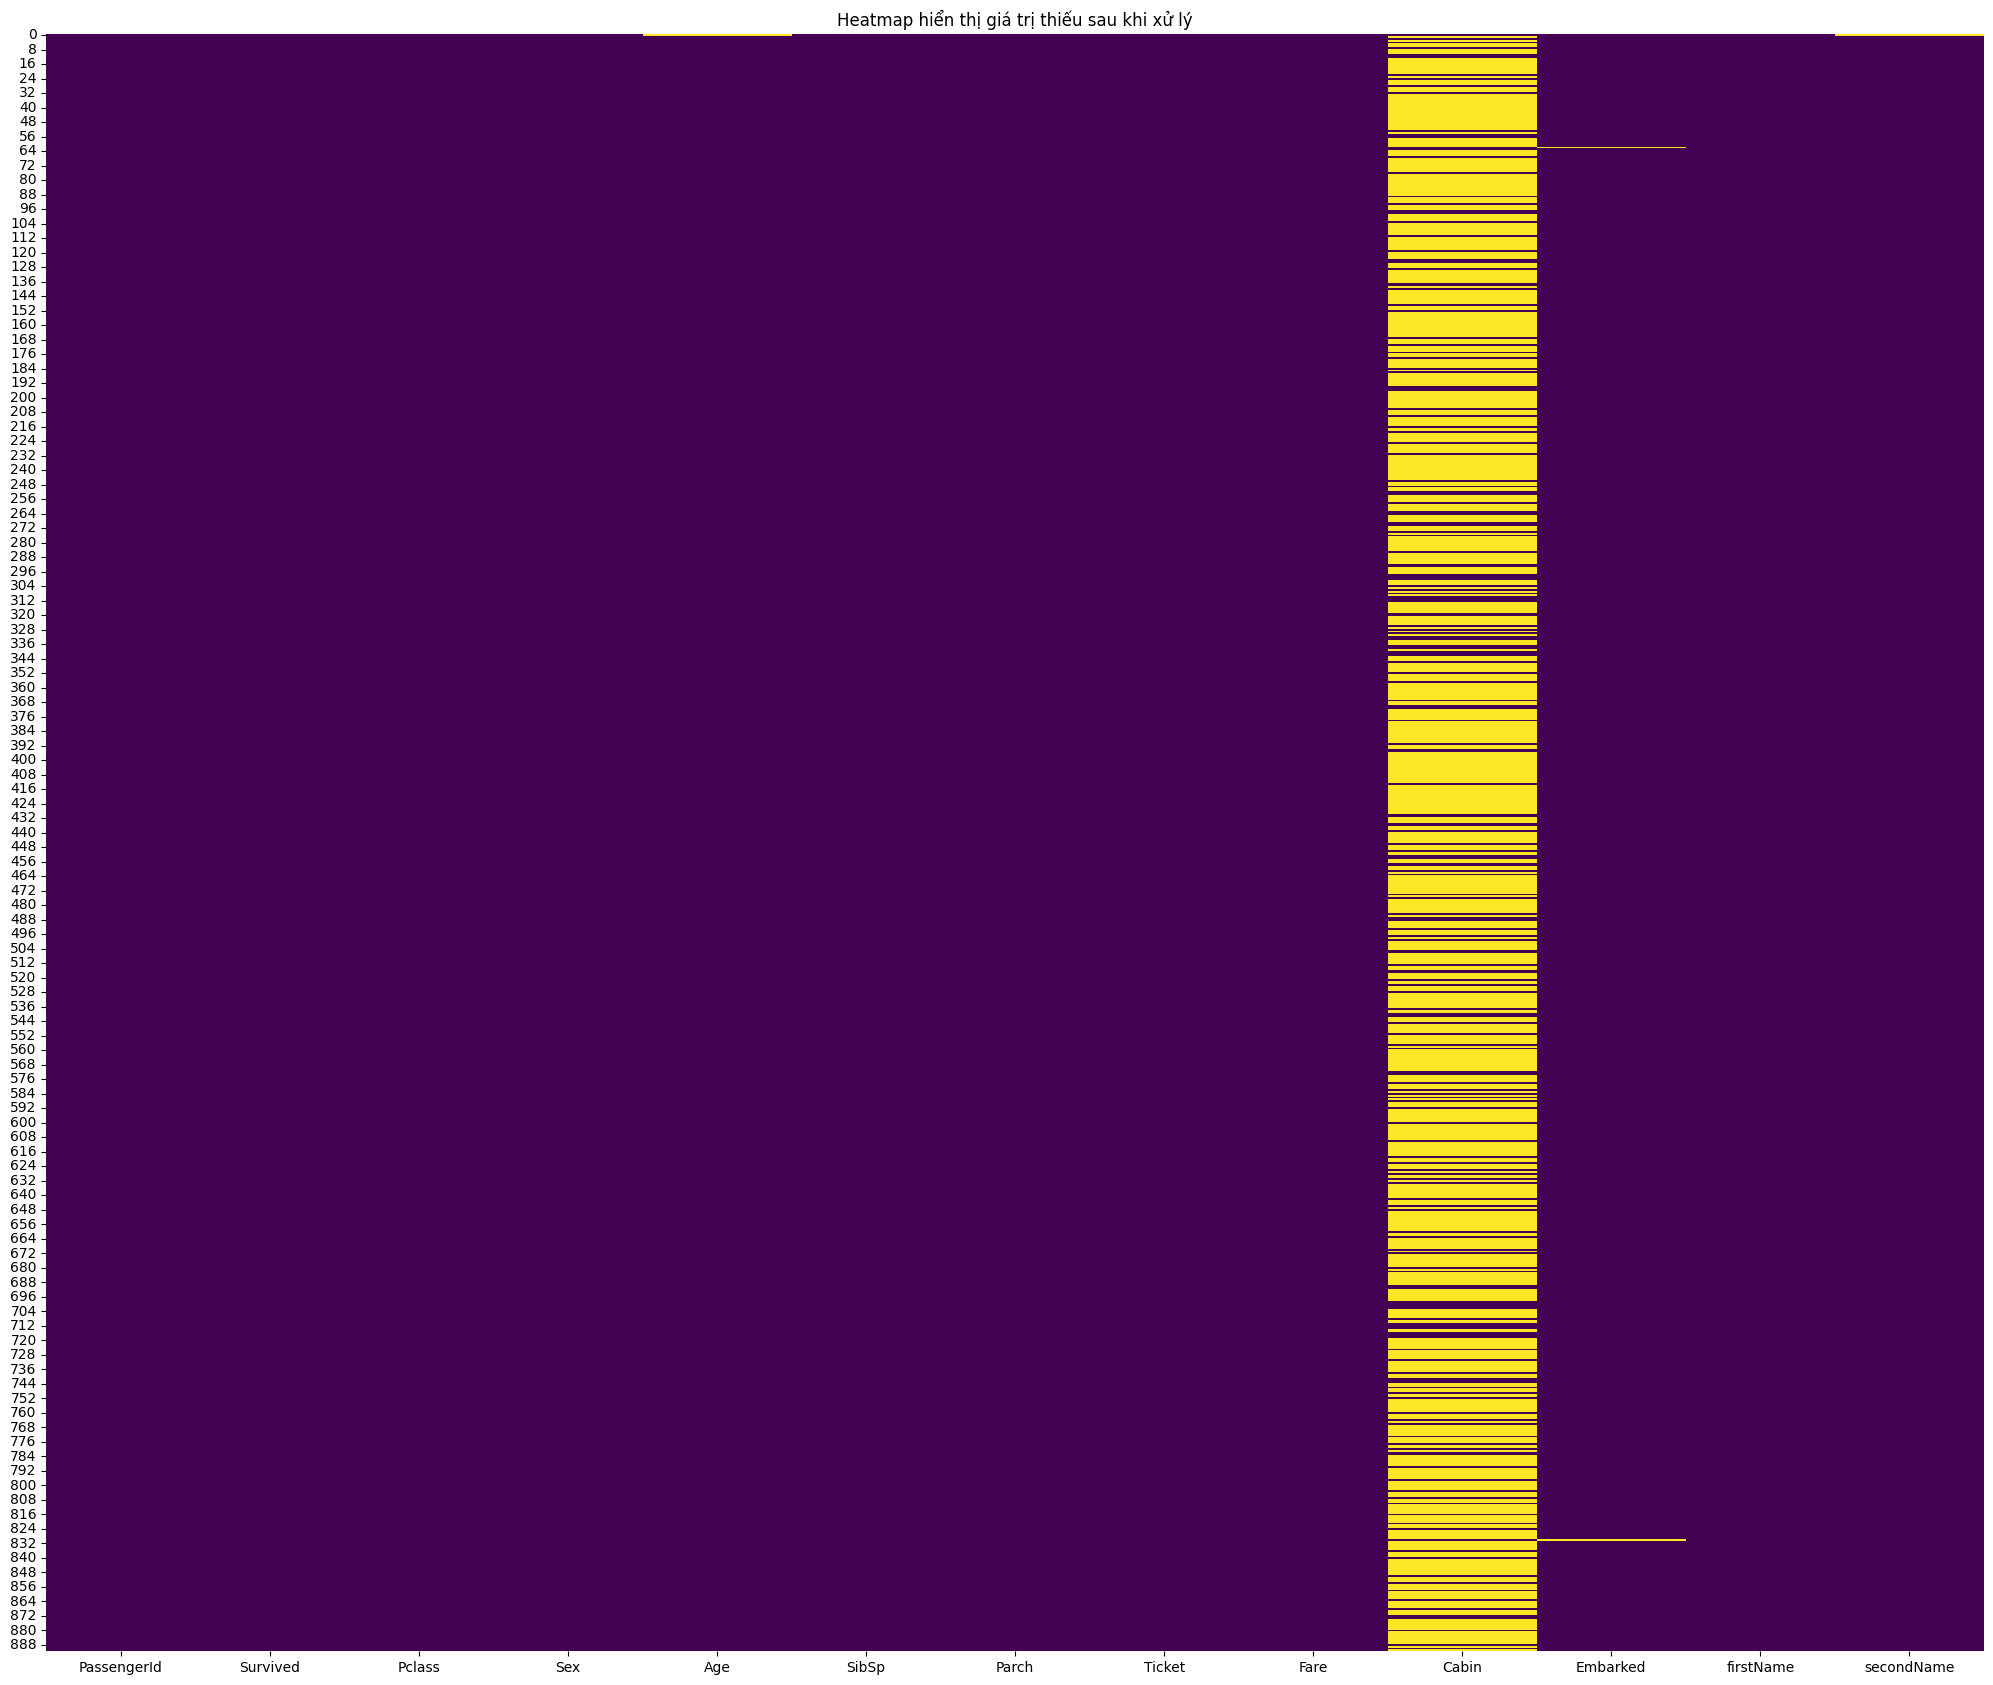

In [497]:
plt.figure(figsize=(25, 21))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap hiển thị giá trị thiếu sau khi xử lý')
plt.show()

Câu 06 :

In [498]:
def age_to_agegroup(Age):
    if Age <= 12:
        return 'Kid'
    elif 12 < Age <= 18:
        return 'Teen'
    elif 18 < Age <= 60:
        return 'Adult'
    else:
        return 'Older'

In [499]:
df['Agegroup'] = df['Age'].apply(age_to_agegroup)

In [500]:
df[['Age', 'Agegroup']].head(20)

,Age,Agegroup
0,NaN,Older
1,22.00000,Adult
2,38.00000,Adult
3,26.00000,Adult
4,35.00000,Adult
5,35.00000,Adult
6,25.14062,Adult
7,54.00000,Adult
8,2.00000,Kid
9,27.00000,Adult


Câu 07 :

In [501]:
def extract_name_prefix(secondName):
    if pd.isnull(secondName):
        return None
    name_parts = secondName.split('.')
    if len(name_parts) > 0:
        for part in name_parts:
            if 'Mr' in part or 'Mrs' in part or 'Miss' in part or 'Master' in part:
                return part.strip()

In [502]:
df['namePrefix'] = df['secondName'].apply(extract_name_prefix)

In [503]:
df[['secondName', 'namePrefix']]

,secondName,namePrefix
0,None,None
1,Mr. Owen Harris,Mr
2,Mrs. John Bradley (Florence Briggs Thayer),Mrs
3,Miss. Laina,Miss
4,Mrs. Jacques Heath (Lily May Peel),Mrs
...,...,...
887,Rev. Juozas,None
888,Miss. Margaret Edith,Miss
889,"Miss. Catherine Helen ""Carrie""",Miss
890,Mr. Karl Howell,Mr


In [504]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix
0,PassengerId,Survived,Pclass,Sex,NaN,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name,None,Older,None
1,1,0,3,M,22.00000,1,0,A/5 21171,7.25,NaN,S,Braund,Mr. Owen Harris,Adult,Mr
2,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs
3,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.925,NaN,S,Heikkinen,Miss. Laina,Adult,Miss
4,4,1,1,F,35.00000,1,0,113803,53.1,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,0,2,M,27.00000,0,0,211536,13,NaN,S,Montvila,Rev. Juozas,Adult,None
888,888,1,1,F,19.00000,0,0,112053,30,B42,S,Graham,Miss. Margaret Edith,Adult,Miss
889,889,0,3,F,25.14062,1,2,W./C. 6607,23.45,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie""",Adult,Miss
890,890,1,1,M,26.00000,0,0,111369,30,C148,C,Behr,Mr. Karl Howell,Adult,Mr


Câu 08 :

In [507]:
df['SibSp'] = df['SibSp'].fillna(0)
df['Parch'] = df['Parch'].fillna(0)

In [508]:
df['SibSp'] = pd.to_numeric(df['SibSp'], errors='coerce').fillna(0).astype(int)
df['Parch'] = pd.to_numeric(df['Parch'], errors='coerce').fillna(0).astype(int)

In [509]:
df['familySize'] = 1 + df['SibSp'] + df['Parch']

In [510]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix,familySize
0,PassengerId,Survived,Pclass,Sex,NaN,0,0,Ticket,Fare,Cabin,Embarked,Name,None,Older,None,1
1,1,0,3,M,22.00000,1,0,A/5 21171,7.25,NaN,S,Braund,Mr. Owen Harris,Adult,Mr,2
2,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs,2
3,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.925,NaN,S,Heikkinen,Miss. Laina,Adult,Miss,1
4,4,1,1,F,35.00000,1,0,113803,53.1,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,0,2,M,27.00000,0,0,211536,13,NaN,S,Montvila,Rev. Juozas,Adult,None,1
888,888,1,1,F,19.00000,0,0,112053,30,B42,S,Graham,Miss. Margaret Edith,Adult,Miss,1
889,889,0,3,F,25.14062,1,2,W./C. 6607,23.45,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie""",Adult,Miss,4
890,890,1,1,M,26.00000,0,0,111369,30,C148,C,Behr,Mr. Karl Howell,Adult,Mr,1


Câu 09 :

In [515]:
df['Alone'] = df['familySize'].apply(lambda x: 1 if x == 1 else 0)

In [516]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix,familySize,Alone
0,PassengerId,Survived,Pclass,Sex,NaN,0,0,Ticket,Fare,Cabin,Embarked,Name,None,Older,None,1,1
1,1,0,3,M,22.00000,1,0,A/5 21171,7.25,NaN,S,Braund,Mr. Owen Harris,Adult,Mr,2,0
2,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs,2,0
3,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.925,NaN,S,Heikkinen,Miss. Laina,Adult,Miss,1,1
4,4,1,1,F,35.00000,1,0,113803,53.1,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,0,2,M,27.00000,0,0,211536,13,NaN,S,Montvila,Rev. Juozas,Adult,None,1,1
888,888,1,1,F,19.00000,0,0,112053,30,B42,S,Graham,Miss. Margaret Edith,Adult,Miss,1,1
889,889,0,3,F,25.14062,1,2,W./C. 6607,23.45,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie""",Adult,Miss,4,0
890,890,1,1,M,26.00000,0,0,111369,30,C148,C,Behr,Mr. Karl Howell,Adult,Mr,1,1


Câu 10 :

In [517]:
df['Cabin'].fillna('Unknown', inplace=True)

In [518]:
df['typeCabin'] = df['Cabin'].apply(lambda x: x[0])

In [520]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix,familySize,Alone,typeCabin
0,PassengerId,Survived,Pclass,Sex,NaN,0,0,Ticket,Fare,Cabin,Embarked,Name,None,Older,None,1,1,C
1,1,0,3,M,22.00000,1,0,A/5 21171,7.25,Unknown,S,Braund,Mr. Owen Harris,Adult,Mr,2,0,U
2,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs,2,0,C
3,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.925,Unknown,S,Heikkinen,Miss. Laina,Adult,Miss,1,1,U
4,4,1,1,F,35.00000,1,0,113803,53.1,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs,2,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,0,2,M,27.00000,0,0,211536,13,Unknown,S,Montvila,Rev. Juozas,Adult,None,1,1,U
888,888,1,1,F,19.00000,0,0,112053,30,B42,S,Graham,Miss. Margaret Edith,Adult,Miss,1,1,B
889,889,0,3,F,25.14062,1,2,W./C. 6607,23.45,Unknown,S,Johnston,"Miss. Catherine Helen ""Carrie""",Adult,Miss,4,0,U
890,890,1,1,M,26.00000,0,0,111369,30,C148,C,Behr,Mr. Karl Howell,Adult,Mr,1,1,C


Câu 12 :

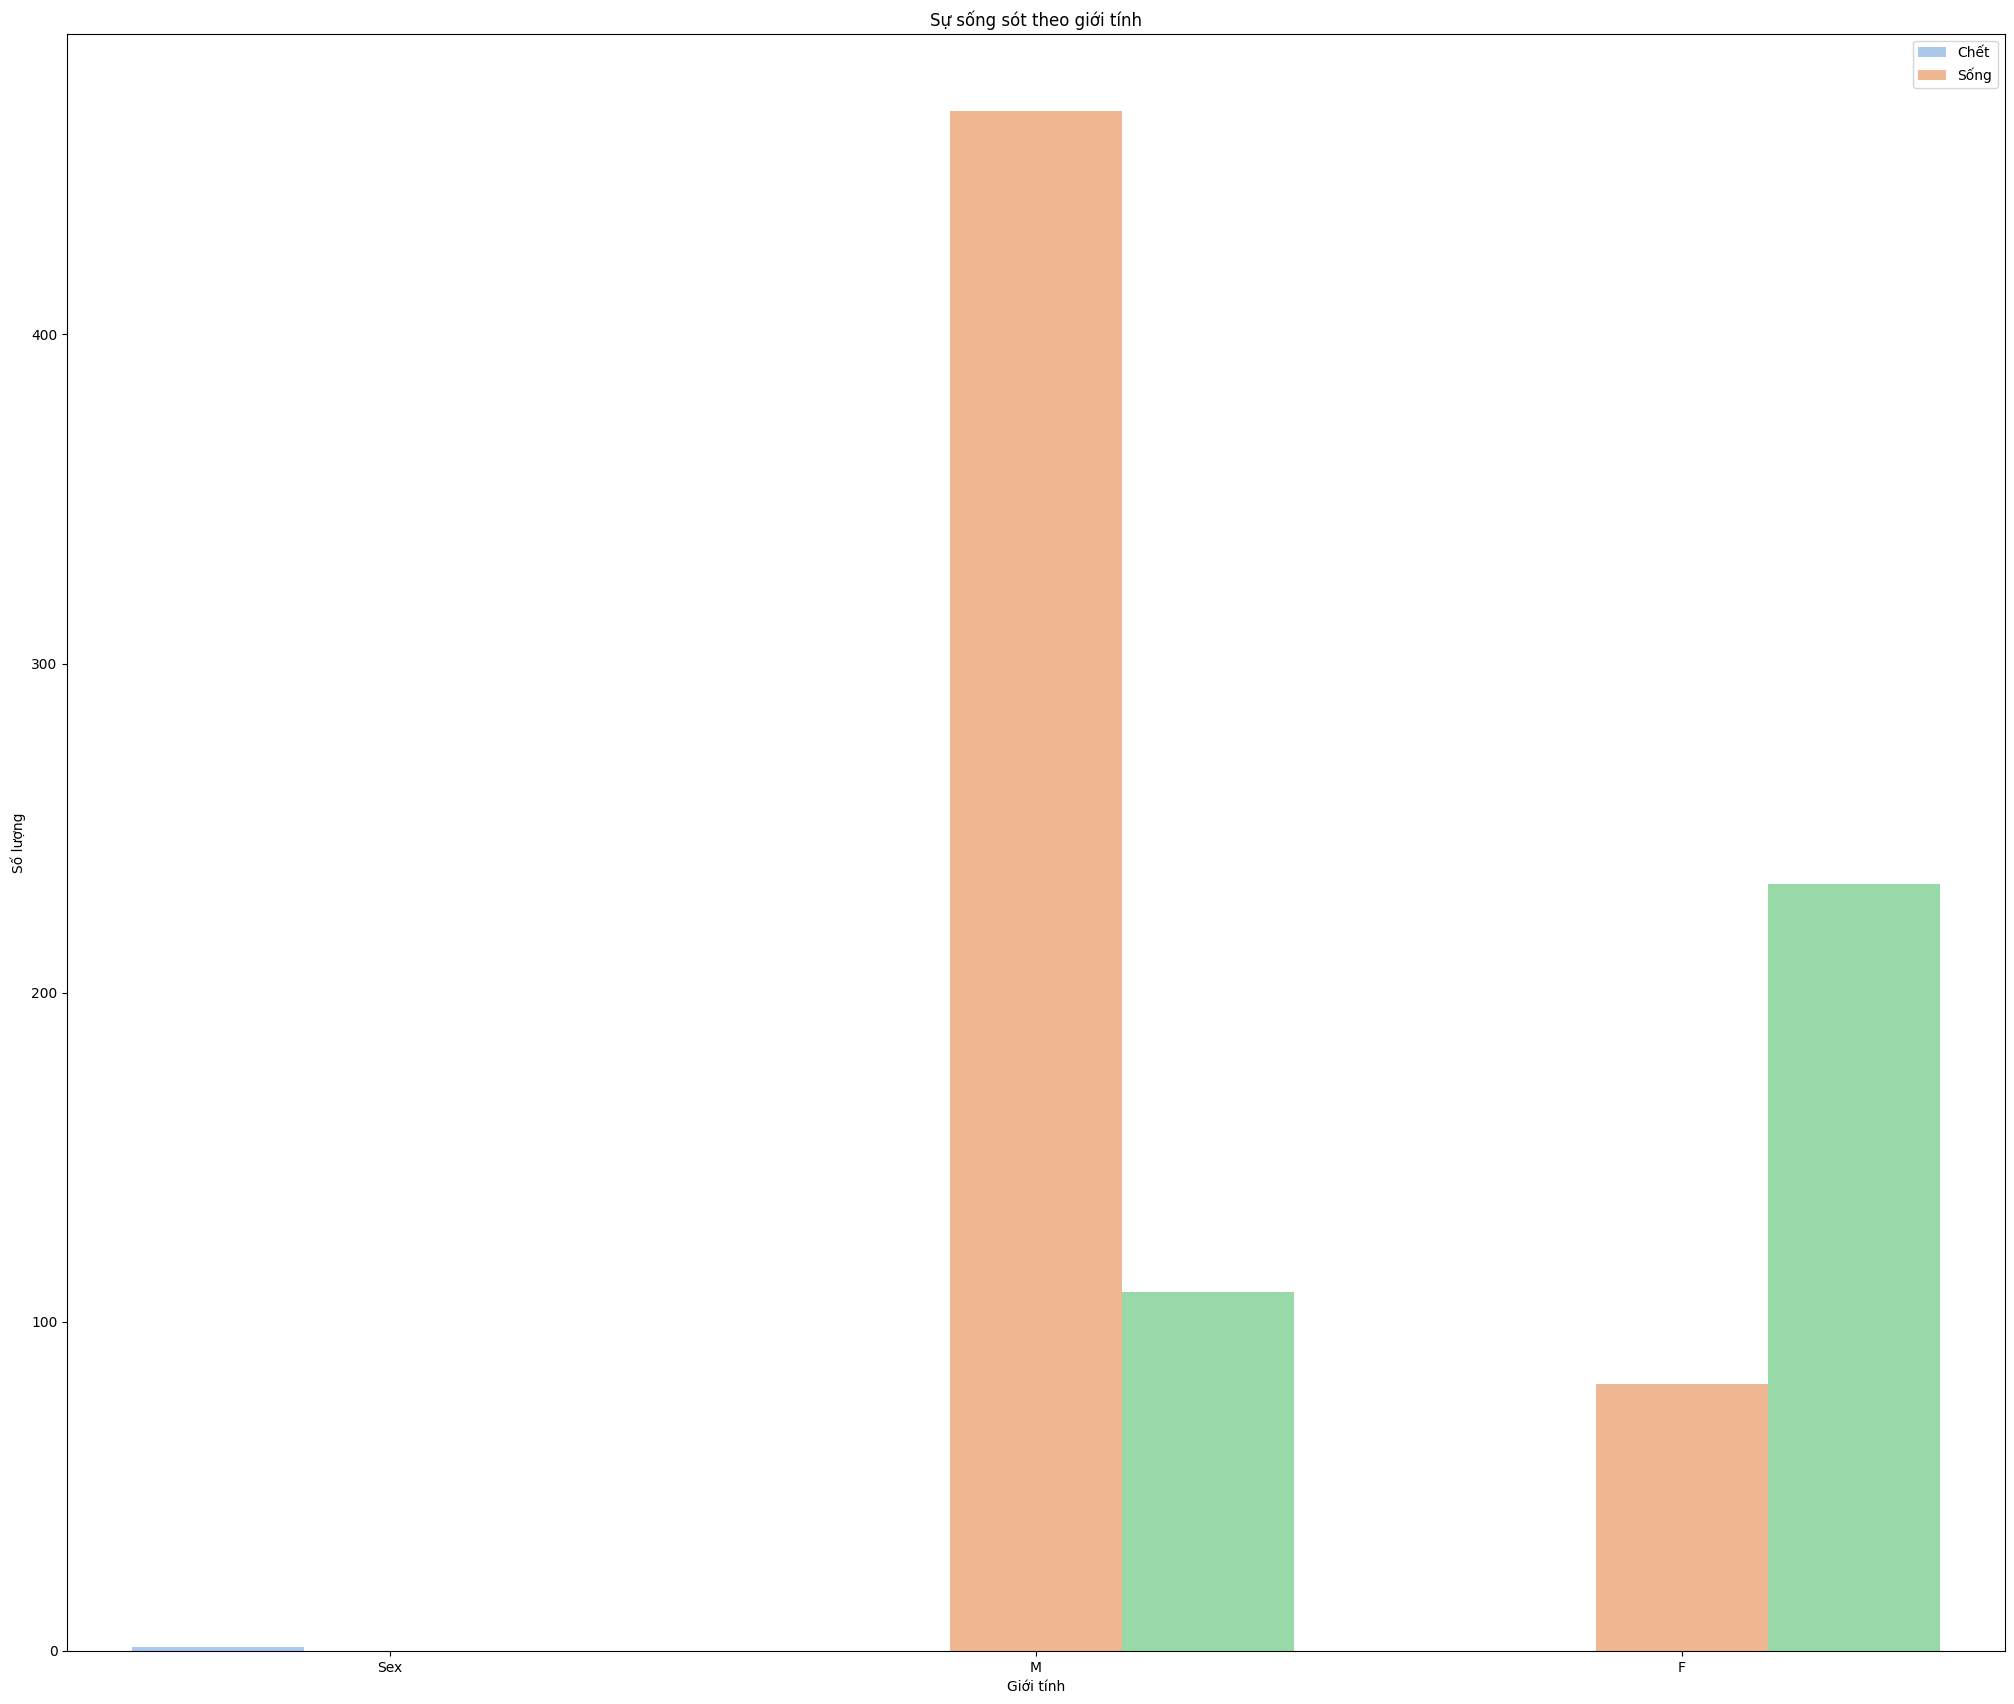

In [523]:
plt.figure(figsize=(25, 21))
sns.countplot(x='Sex', hue='Survived', data=df, palette='pastel')
plt.title('Sự sống sót theo giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')
plt.legend(['Chết', 'Sống'])
plt.show()

Câu 13 :

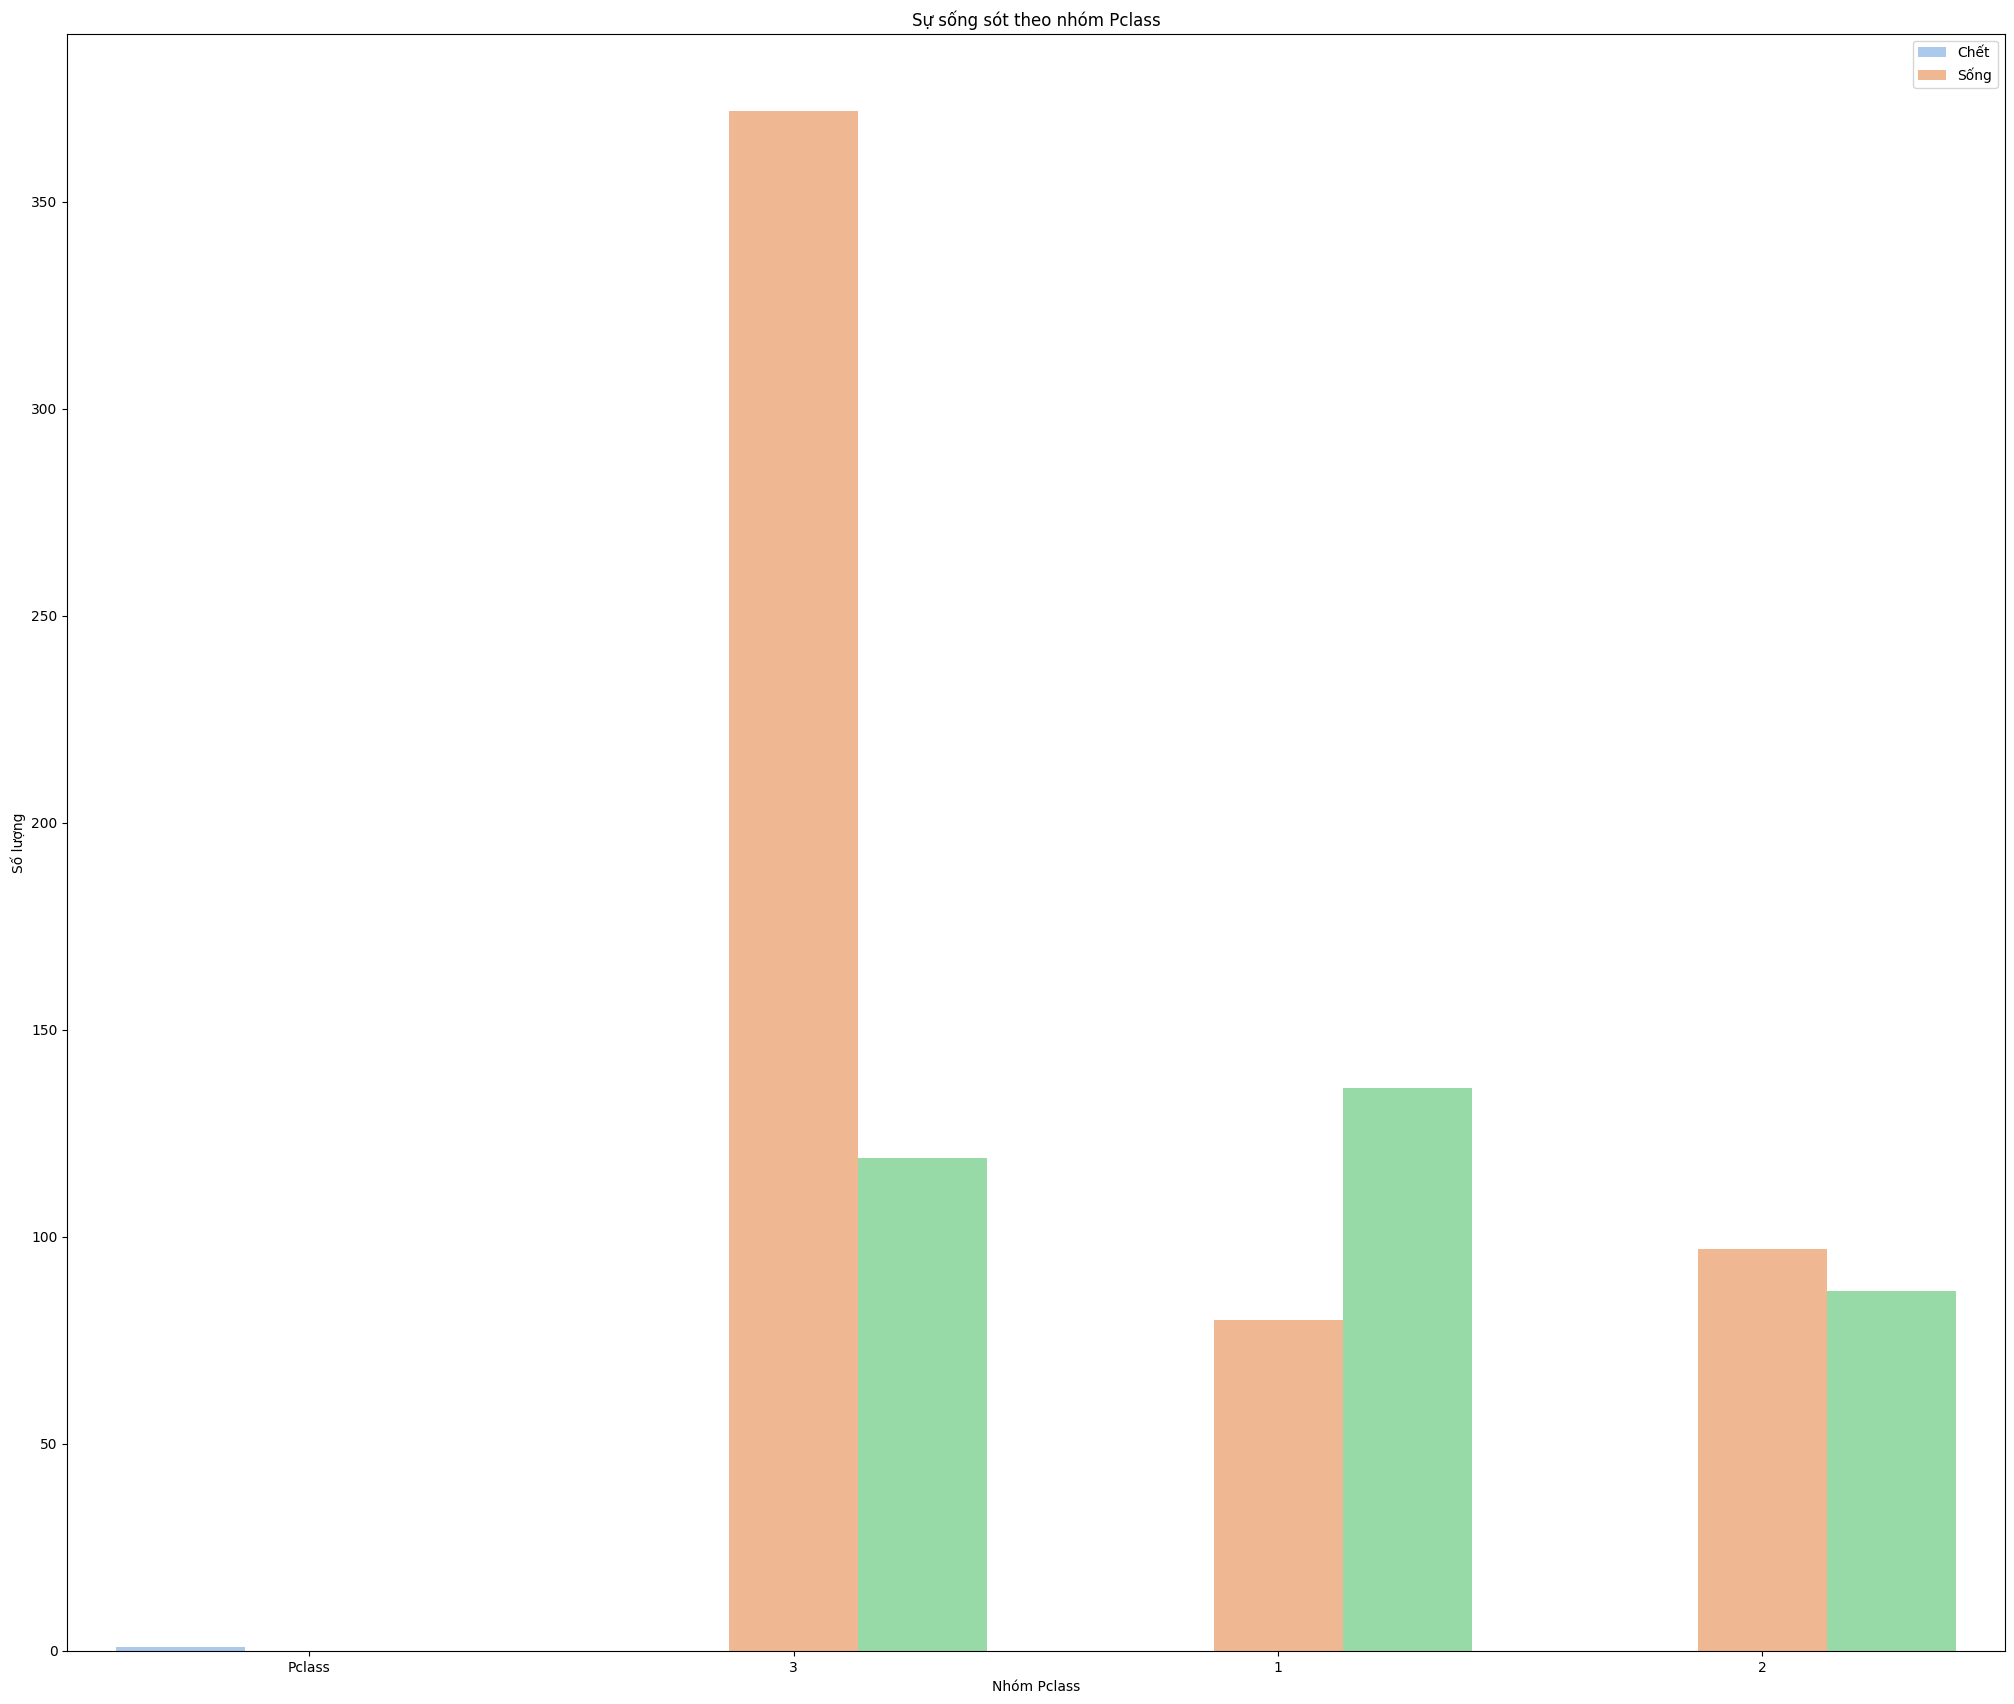

In [524]:
plt.figure(figsize=(25, 21))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='pastel')
plt.title('Sự sống sót theo nhóm Pclass')
plt.xlabel('Nhóm Pclass')
plt.ylabel('Số lượng')
plt.legend(['Chết', 'Sống'])
plt.show()

Câu 14 :

In [528]:
age_bins = [0, 18, 35, 50, 100]
age_labels = ['Child', 'Young Adult', 'Adult', 'Senior']

In [529]:
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

In [531]:
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')

In [532]:
survival_rate = df.groupby(['Sex', 'AgeGroup'])['Survived'].mean().unstack()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10508\282499246.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = df.groupby(['Sex', 'AgeGroup'])['Survived'].mean().unstack()


C:\Users\Admin\AppData\Local\Temp\ipykernel_10508\598811691.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['Sex', 'AgeGroup'])['Survived'].mean().unstack()


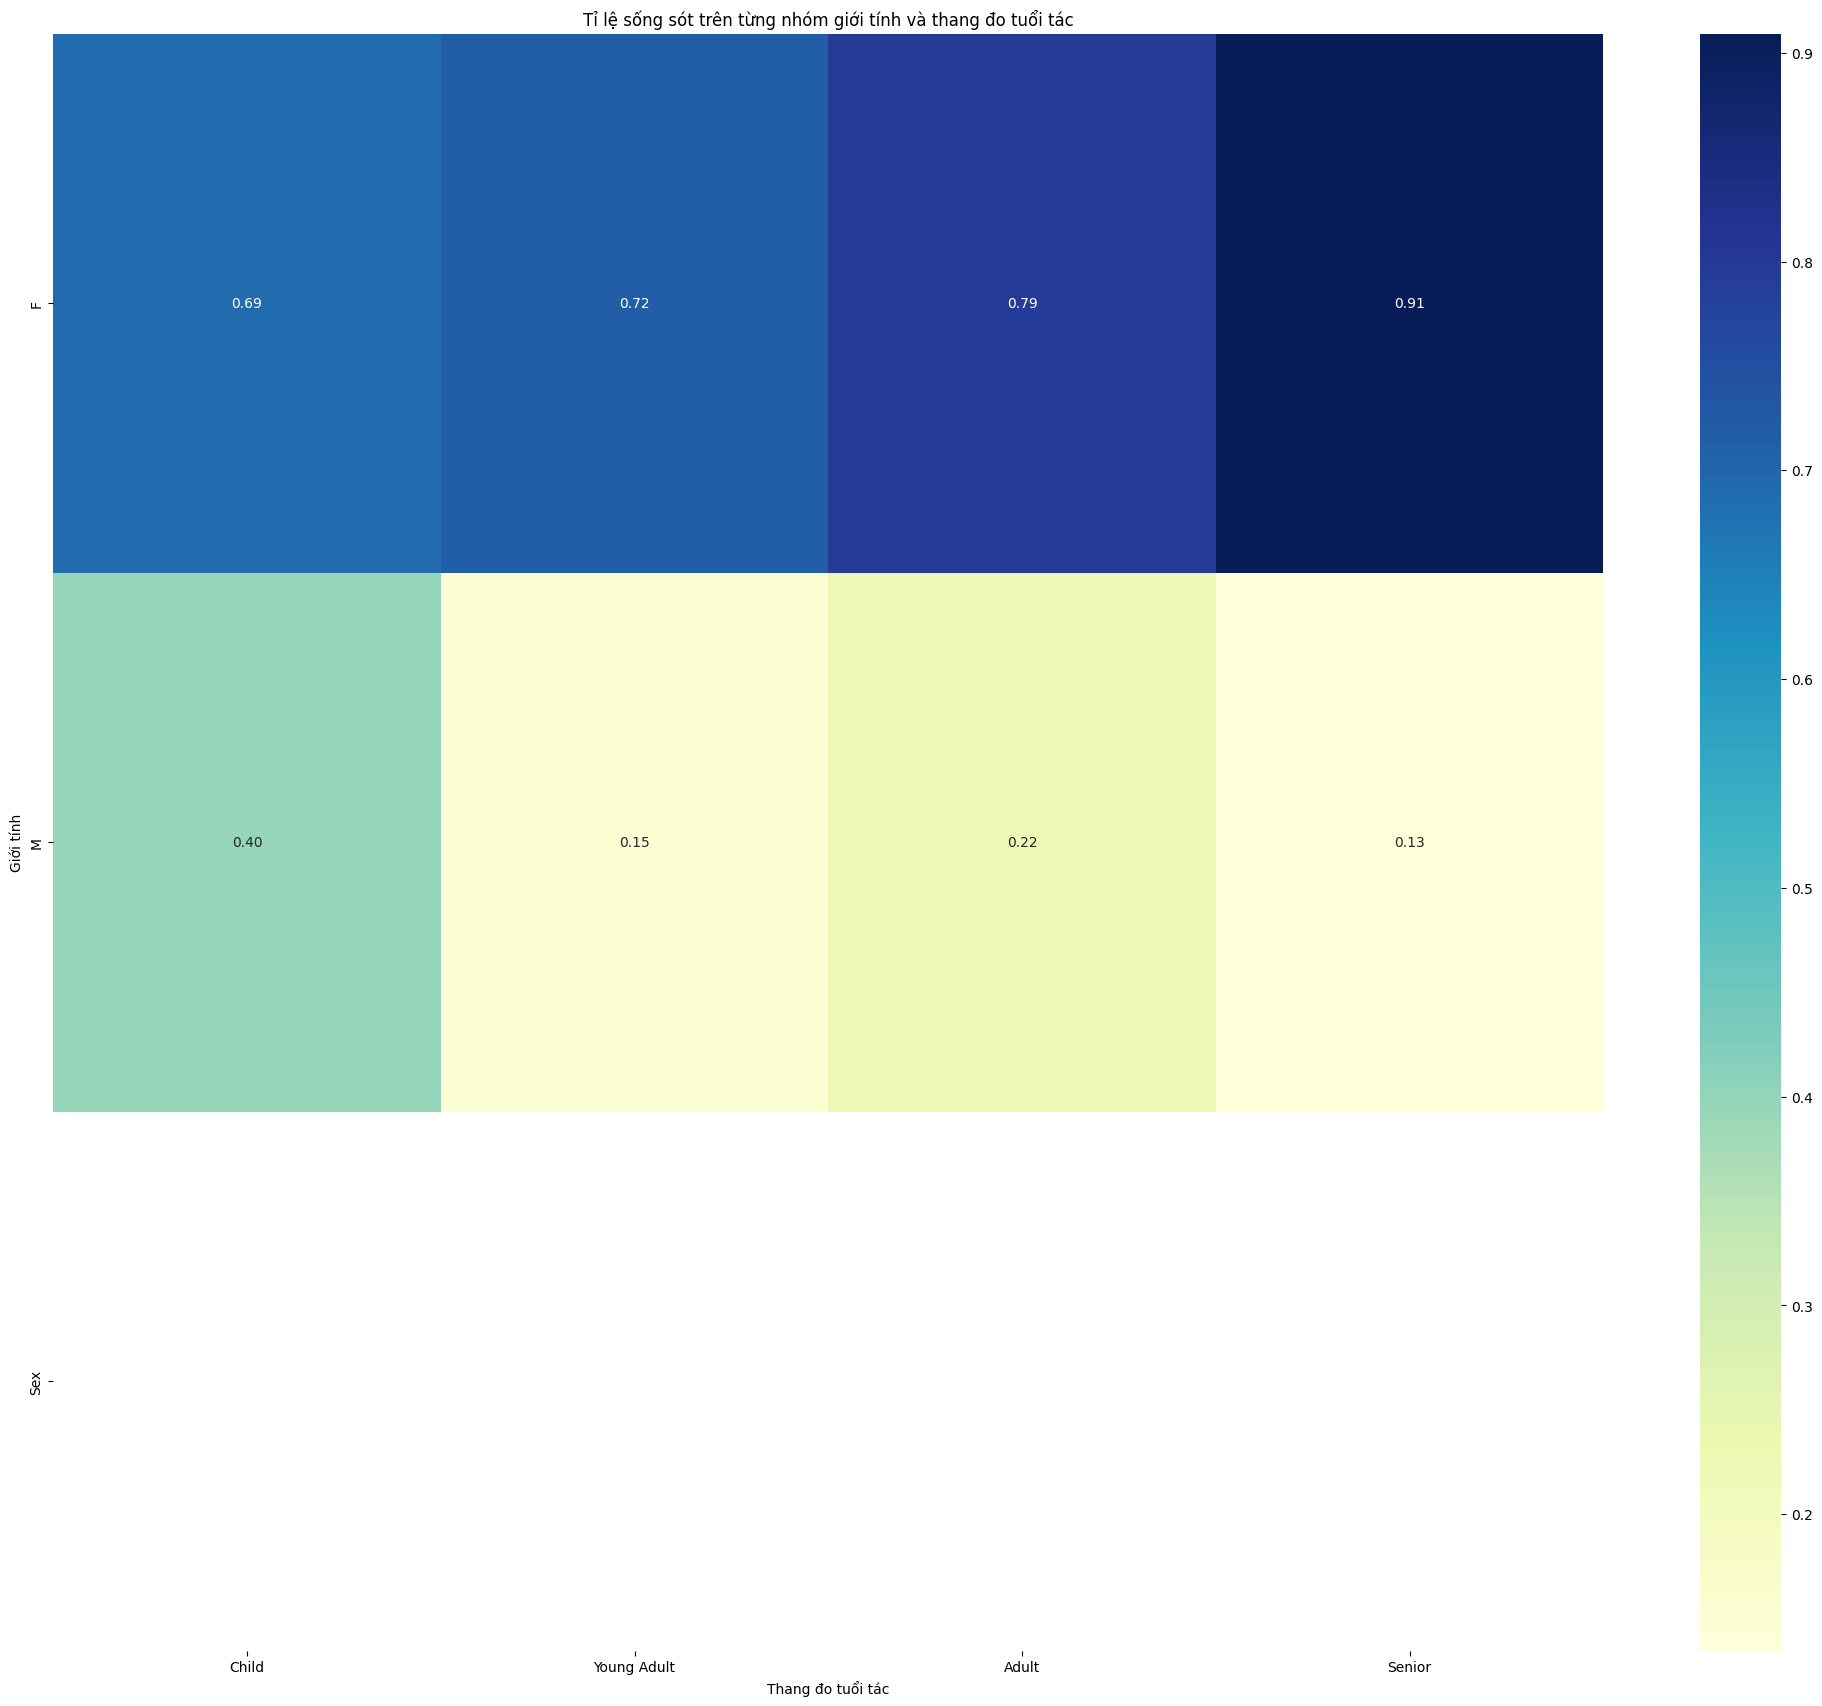

In [533]:
plt.figure(figsize=(25, 21))
heatmap_data = df.groupby(['Sex', 'AgeGroup'])['Survived'].mean().unstack()
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Tỉ lệ sống sót trên từng nhóm giới tính và thang đo tuổi tác')
plt.xlabel('Thang đo tuổi tác')
plt.ylabel('Giới tính')
plt.show()

Câu 15 :

In [534]:
df['familySizeGroup'] = pd.cut(df['familySize'], bins=[-1, 0, 1, 4], labels=['Alone', 'Small', 'Large'])

In [535]:
survival_rate = df.groupby('familySizeGroup')['Survived'].mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10508\2282878174.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = df.groupby('familySizeGroup')['Survived'].mean()


C:\Users\Admin\AppData\Local\Temp\ipykernel_10508\4238771119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate.index, y=survival_rate.values, palette='Set2')


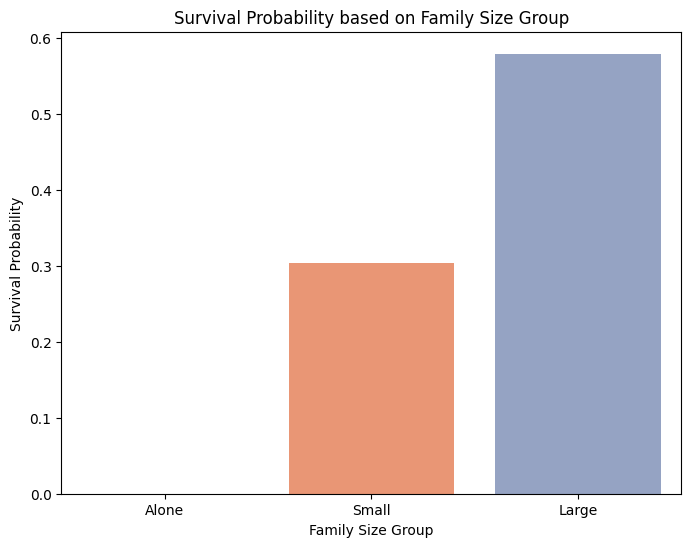

In [536]:
plt.figure(figsize=(25, 21))
sns.barplot(x=survival_rate.index, y=survival_rate.values, palette='Set2')
plt.title('Survival Probability based on Family Size Group')
plt.xlabel('Family Size Group')
plt.ylabel('Survival Probability')
plt.show()

Câu 16 :

In [538]:
survival_rate = df.groupby('Pclass')['Survived'].mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10508\372882892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate.index, y=survival_rate.values, palette='Set1')


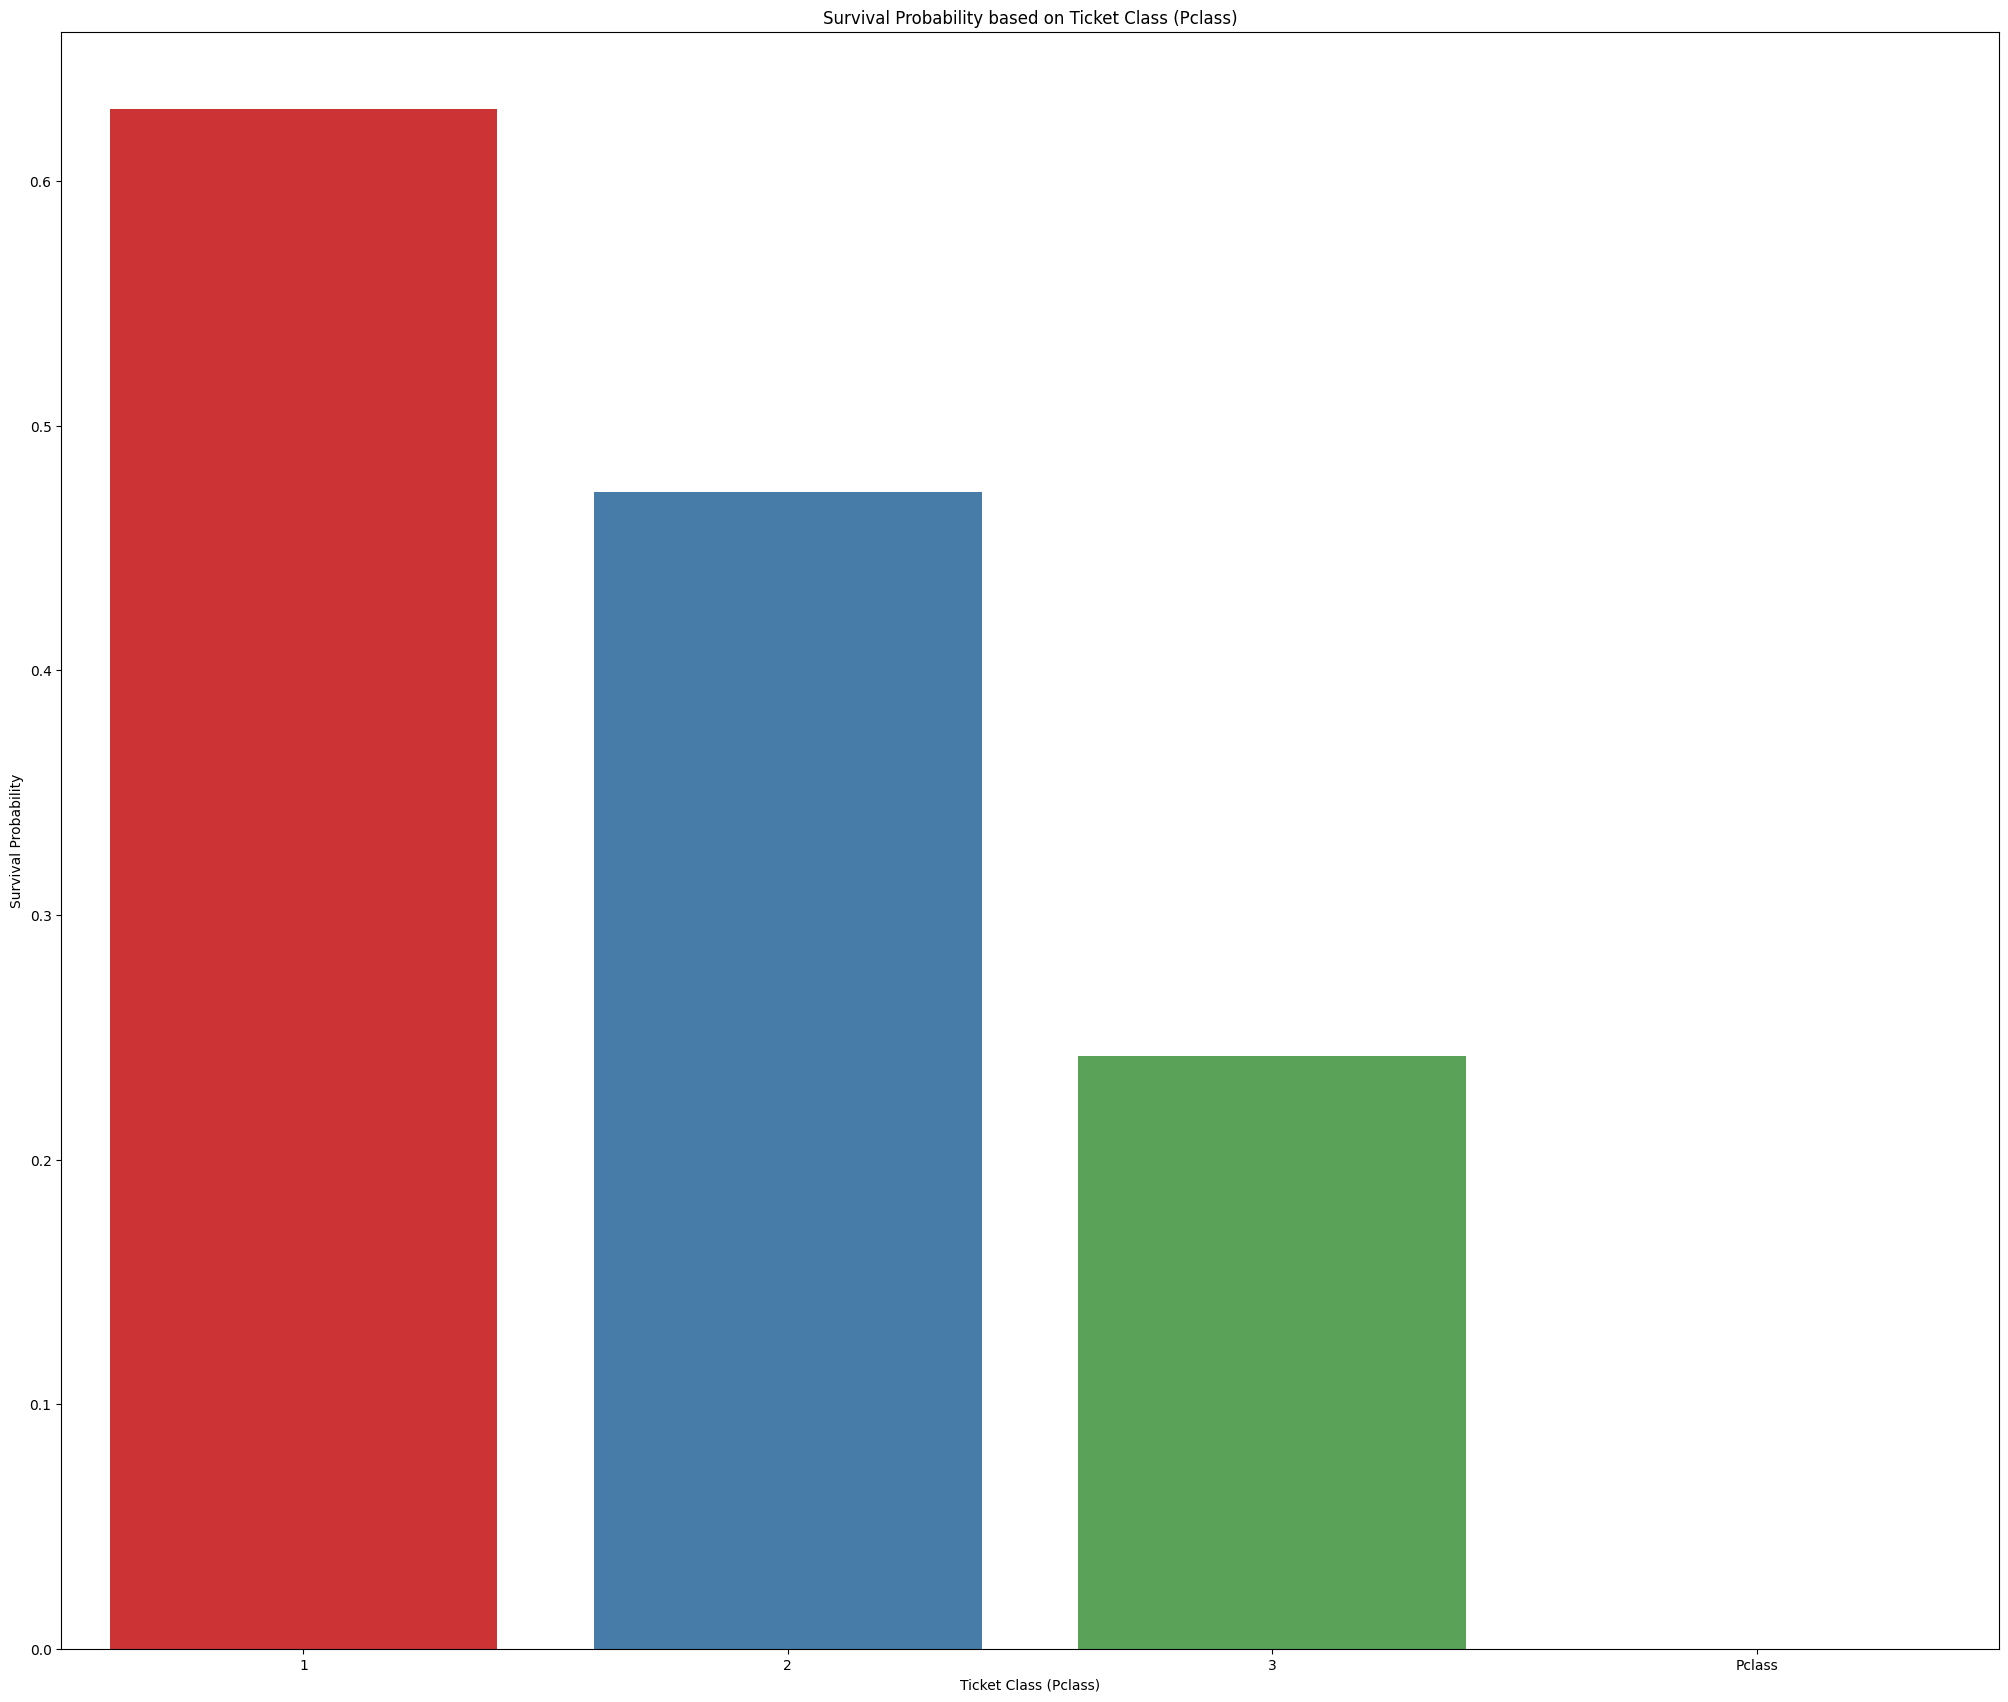

In [539]:
plt.figure(figsize=(25, 21))
sns.barplot(x=survival_rate.index, y=survival_rate.values, palette='Set1')
plt.title('Survival Probability based on Ticket Class (Pclass)')
plt.xlabel('Ticket Class (Pclass)')
plt.ylabel('Survival Probability')
plt.show()

Câu 17 :

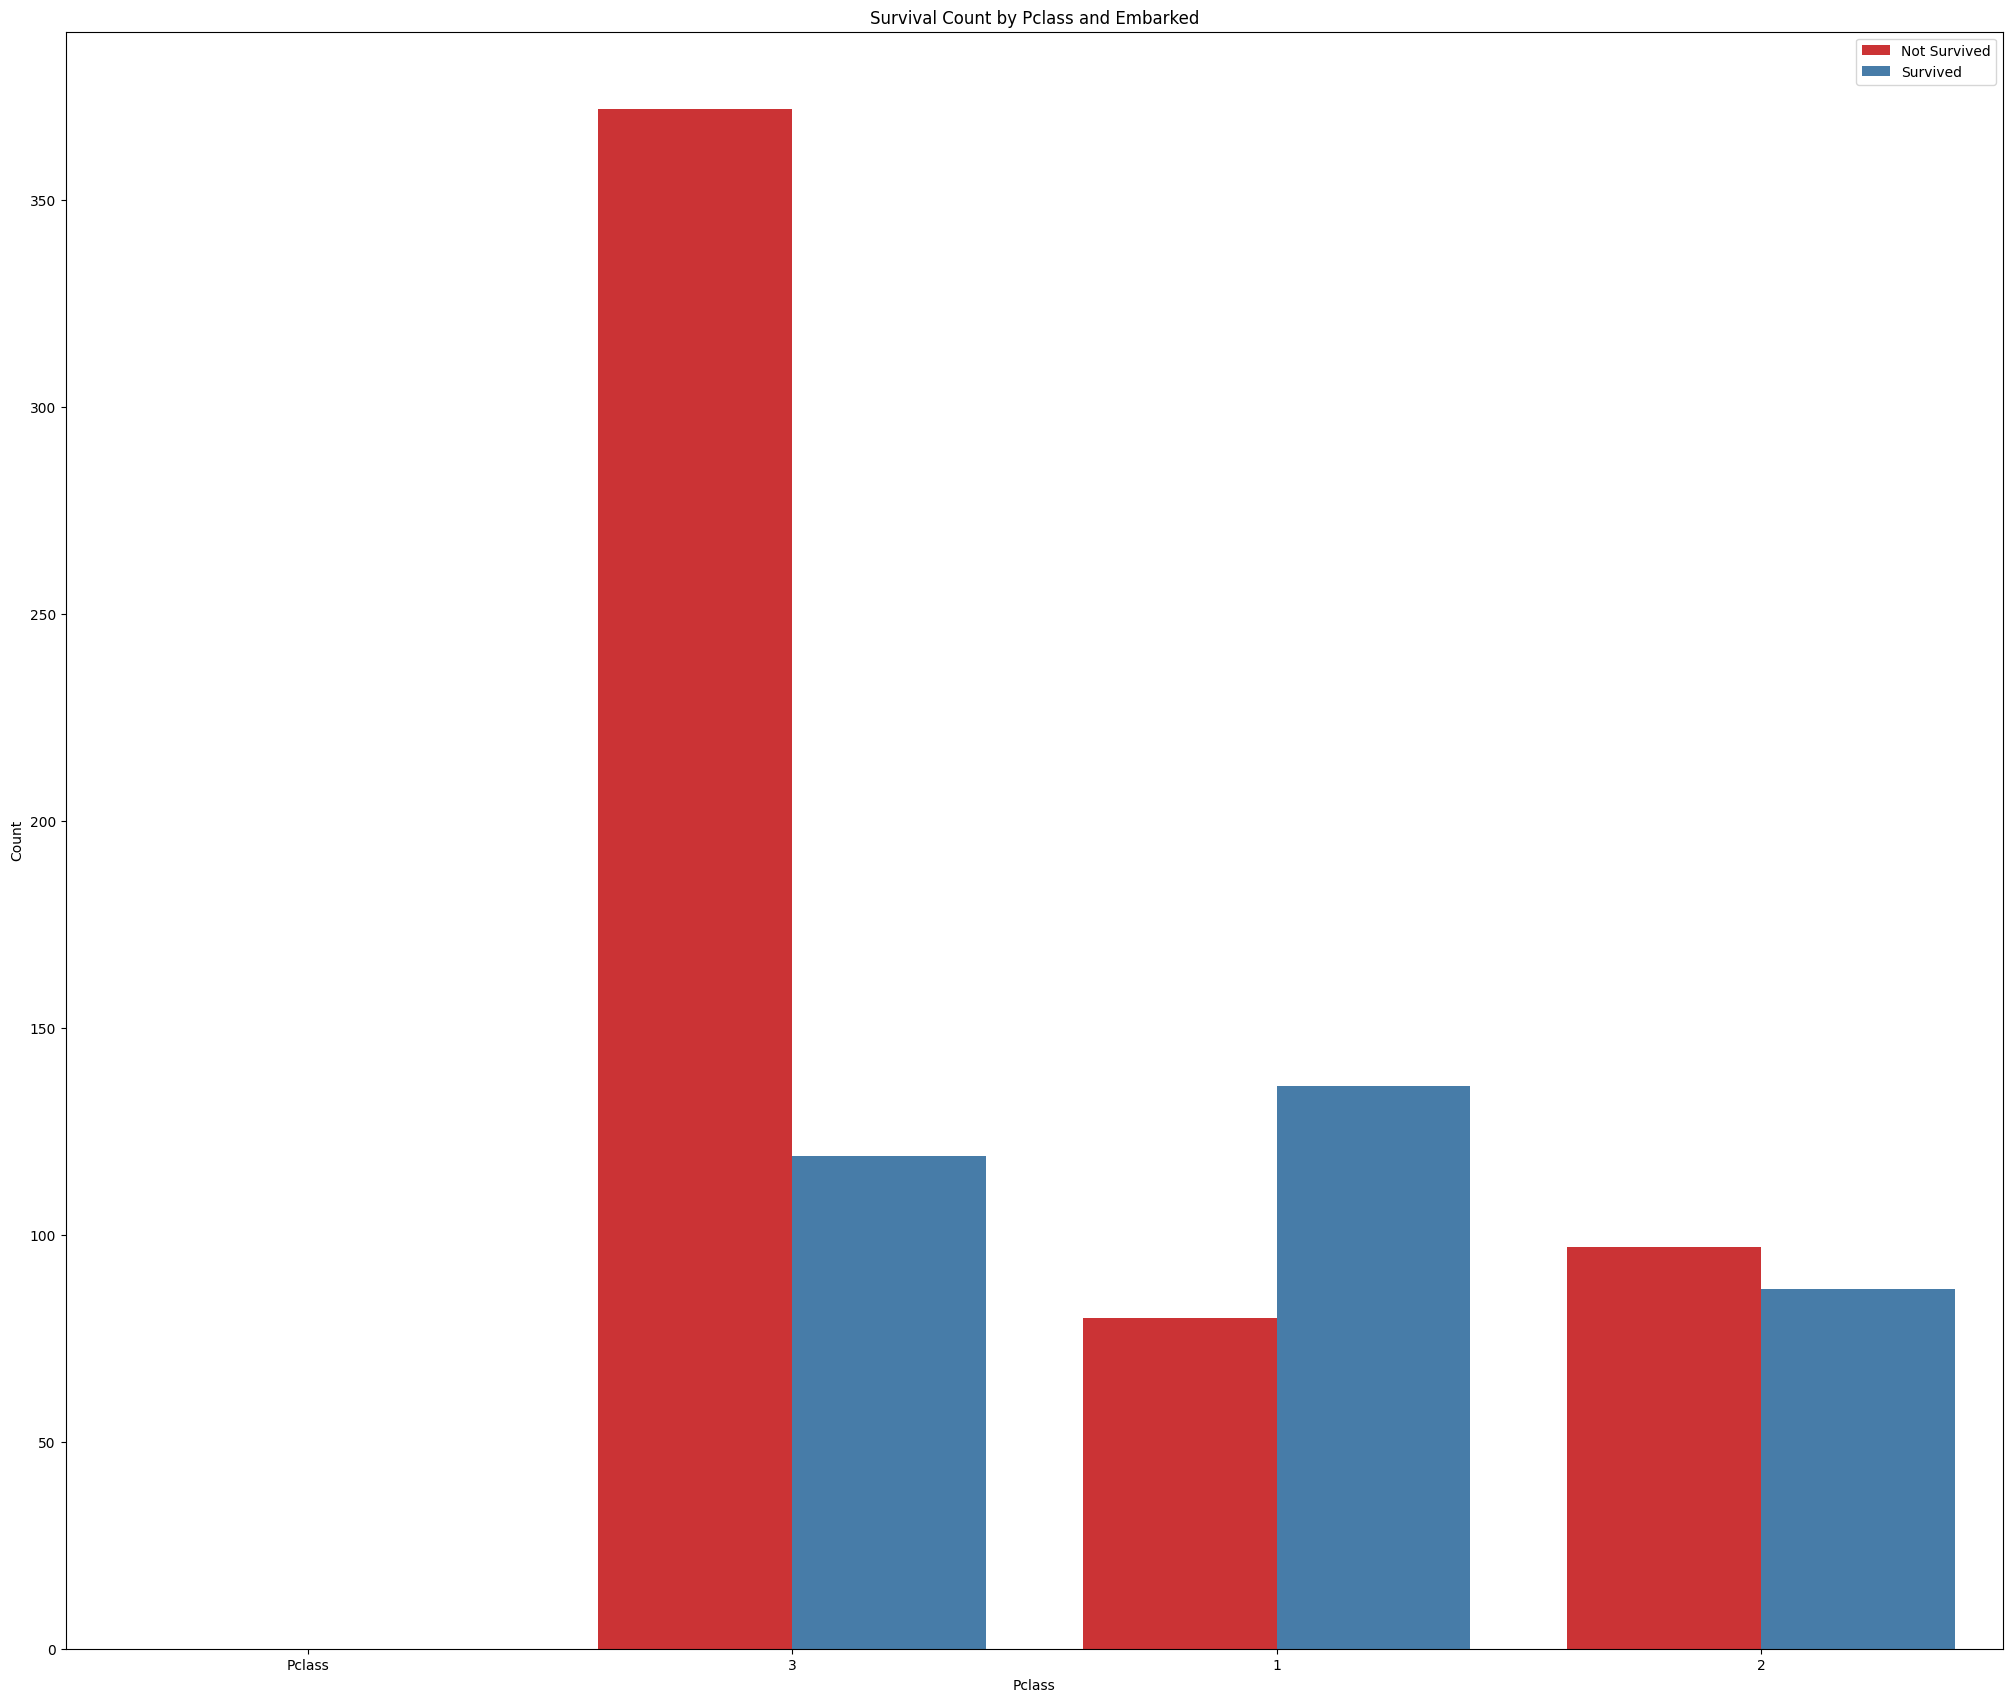

In [540]:
plt.figure(figsize=(25, 21))
sns.countplot(x='Pclass', hue='Survived', data=df, hue_order=[0, 1], palette='Set1')
plt.title('Survival Count by Pclass and Embarked')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()

In [541]:
df.to_csv('FileCSVSaukhilam.csv', index=False)